In [2]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import functions as fun

In [3]:
mods = fun.models()

In [4]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .2
mpl.rcParams['figure.subplot.top']    = .9
mpl.rcParams['figure.subplot.left']   = .15
mpl.rcParams['figure.subplot.right']  = .95
mpl.rcParams['figure.subplot.wspace'] = .1
mpl.rcParams['figure.subplot.hspace'] = .3
mpl.rcParams['figure.figsize']        = 7,6


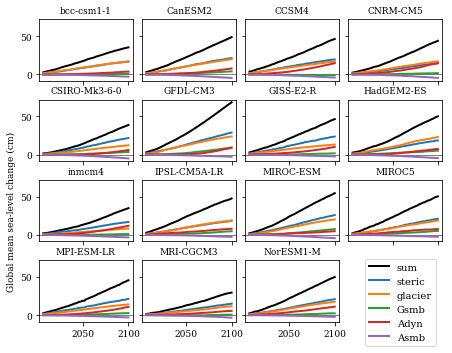

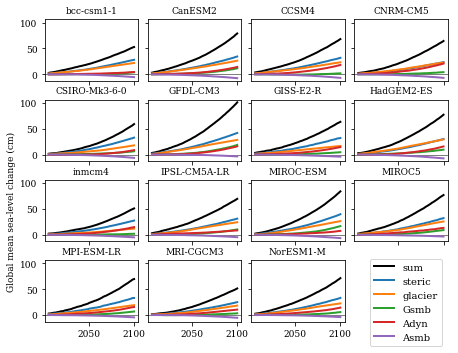

In [11]:
for scen in ['rcp45','rcp85']:
    fig,ax = plt.subplots(4,4,sharex=True,sharey=True)
    for m,model in enumerate(mods):
        if m>12-1:
            dax = ax[3,m-12]
        elif m>8-1:
            dax = ax[2,m-8]
        elif m>4-1:
            dax = ax[1,m-4]
        else:
            dax = ax[0,m]

        with xr.open_dataset(f'data/Adyn/{model}_{scen}.nc') as ds:
            adyn = ds['SLR'].values
            time = ds['time'].values
        with xr.open_dataset(f'data/Asmb/{model}_{scen}.nc') as ds:
            asmb = ds['SLR'].values
        with xr.open_dataset(f'data/Gsmb/{model}_{scen}.nc') as ds:
            gsmb = ds['SLR'].values
        with xr.open_dataset(f'data/steric/{model}_{scen}.nc') as ds:
            ster = ds['SLR'].values        
        with xr.open_dataset(f'data/glacier/{model}_{scen}.nc') as ds:
            glac = ds['SLR'].values   
        slr = adyn+asmb+gsmb+ster+glac

        dax.axhline(0,0,1,color='k',lw=.5)
        dax.plot(time,slr,color='k',label='sum')
        dax.plot(time,ster,label='steric')
        dax.plot(time,glac,label='glacier')
        dax.plot(time,gsmb,label='Gsmb')
        dax.plot(time,adyn,label='Adyn')
        dax.plot(time,asmb,label='Asmb')  
        dax.set_title(model)

    ax[2,0].set_ylabel(f'Global mean sea-level change (cm)')
#    ax[3,1].set_xlabel('Year')
    ax[3,3].set_visible(False)
    ax[3,2].legend(bbox_to_anchor=(1.22, 1.1))

    figname = f'draftplot_ts_components_{scen}.pdf'

    plt.savefig(f'figures/{figname}',dpi=200)
    plt.savefig(f'../../writing/codependence/figures/{figname}')
    plt.show()
    plt.close()